# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Admin\Downloads\data science\Classification Dataset\Credit default\UCI_Credit_Card.csv")
X = df.iloc[:,1:24]
Y = df['default.payment.next.month']

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

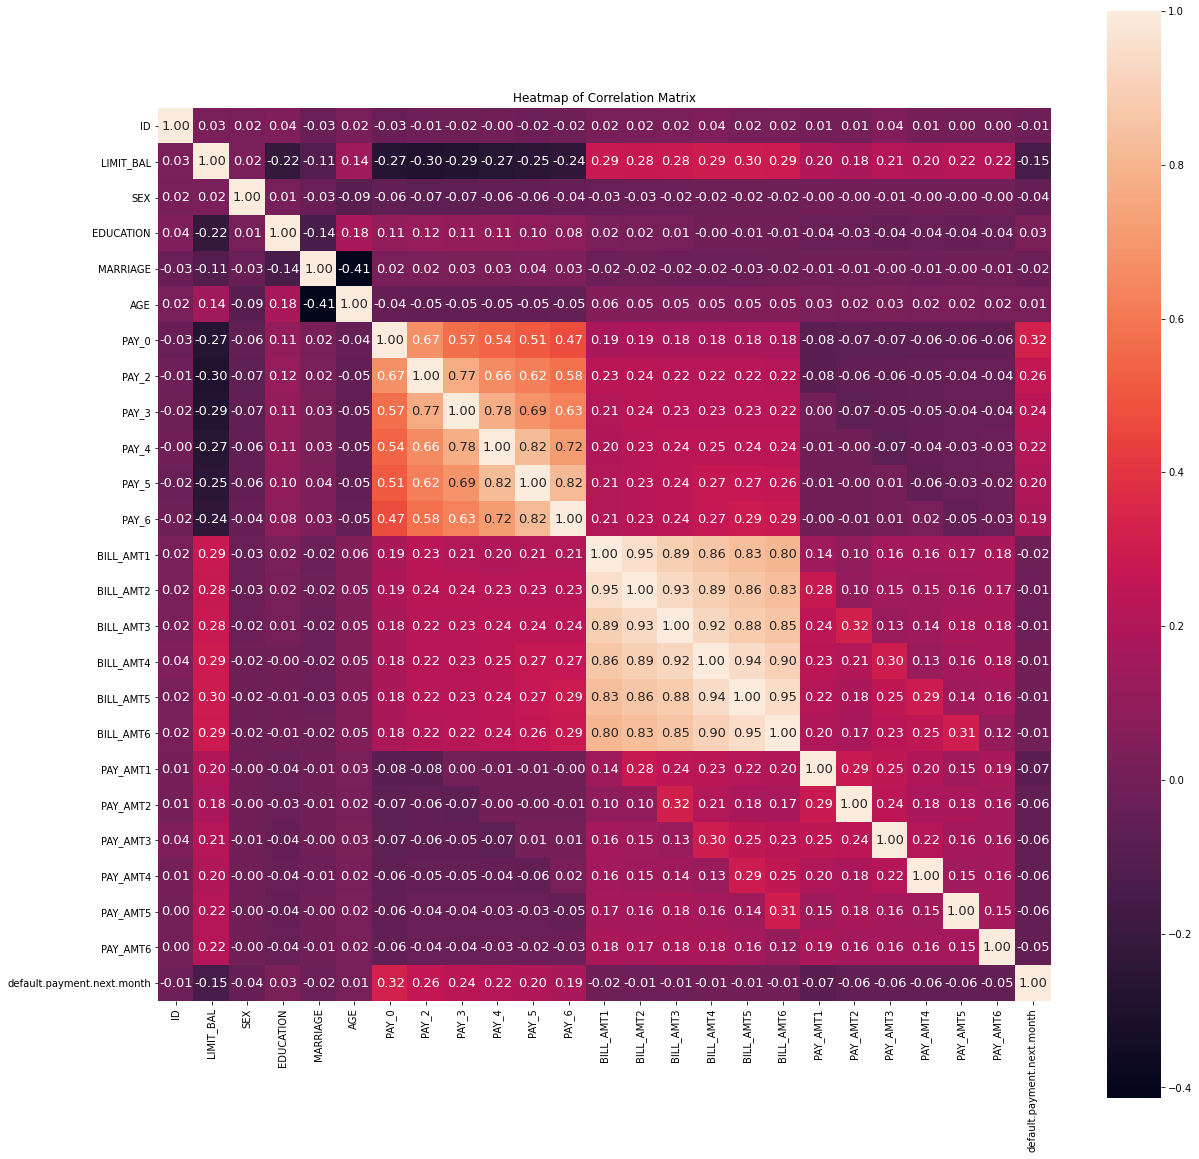

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr=df.corr()
corr = (corr)
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')

In [4]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False)
sex = OHE.fit_transform(X[['SEX']])
marriage = OHE.fit_transform(X[['MARRIAGE']])
education = OHE.fit_transform(X[['EDUCATION']])

cat_variables = np.hstack((sex, marriage, education))

cat_var_names = ['SEX','MARRIAGE', 'EDUCATION']

num_variables = X.drop(cat_var_names, axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(num_variables)
stdz_num_variables = scaler.transform(num_variables)

final_X = np.hstack((cat_variables,stdz_num_variables))

In [5]:
from sklearn.feature_selection import SelectKBest

test = SelectKBest(k=10)
fit = test.fit(final_X,Y)
np.set_printoptions(precision=1)
print(fit.scores_)
features = fit.transform(final_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,Y, test_size=0.33, random_state=42)

[4.8e+01 4.8e+01 5.2e+00 2.7e+01 2.8e+01 2.9e+00 4.0e+00 7.9e+01 4.0e+01
 3.2e+01 1.9e+01 4.0e+01 1.2e+00 7.2e+02 5.8e+00 3.5e+03 2.2e+03 1.8e+03
 1.5e+03 1.3e+03 1.1e+03 1.2e+01 6.0e+00 5.9e+00 3.1e+00 1.4e+00 8.7e-01
 1.6e+02 1.0e+02 9.5e+01 9.7e+01 9.1e+01 8.5e+01]


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

estimator = SVC(kernel='rbf')
selector = estimator.fit(X_train,y_train)
#print(X_train.columns[selector.support_])
y_predict_test = selector.predict(X_test)
y_predict_train = selector.predict(X_train)

In [7]:
print("Train Accuracy Score:", accuracy_score(y_train, y_predict_train))
print("Test Accuracy Score:", accuracy_score(y_test, y_predict_test))

Train Accuracy Score: 0.8232835820895522
Test Accuracy Score: 0.8224242424242424
